In [2]:
import seaborn as sb
import scipy
import math
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

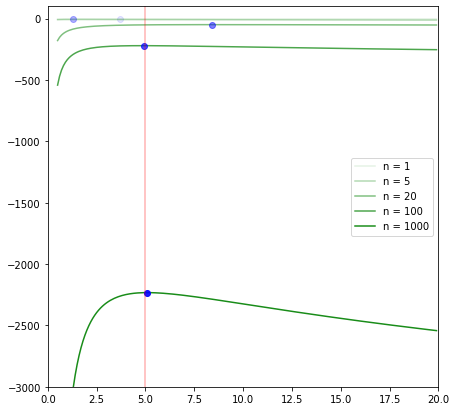

In [113]:
#7.1(a) N(teta,1)
import warnings
warnings.filterwarnings('ignore')

teta_true = 5
def f(x,teta):
    return math.log((1.0/math.sqrt(2 * math.pi * teta)) * math.exp((-(x)**2)/(2 * teta)))
n = [1,5,20,100,1000]
alpha = np.arange(0.1,1,1.0/float(len(n)))
Teta = np.arange(0.5,20,0.1)
fig, ax = plt.subplots(figsize=(7,7))
for i in range(len(n)):
    x = scipy.stats.norm.rvs(loc=0,scale=np.sqrt(teta_true),size=n[i])
    L = np.array([np.sum([f(y,t) for y in x]) for t in Teta])
    ax.plot(Teta,L,label='n = '+str(n[i]),alpha=alpha[i],color='green')
    j = list(L).index(max(list(L)))
    ax.plot(Teta[j],L[j],'ro',alpha=alpha[i],color='blue')
ax.axvline(teta_true,color='red',alpha=0.3)
ax.set_xlim([0,20])
ax.set_ylim([-3000,100])
ax.legend()
plt.show()

1.1999999999999997 0.8333333333333335
1.7999999999999998 0.05292214940134466
1.9999999999999996 9.536743164062542e-07
1.9999999999999996 7.888609052210293e-31
1.9999999999999996 9.332636185034261e-302


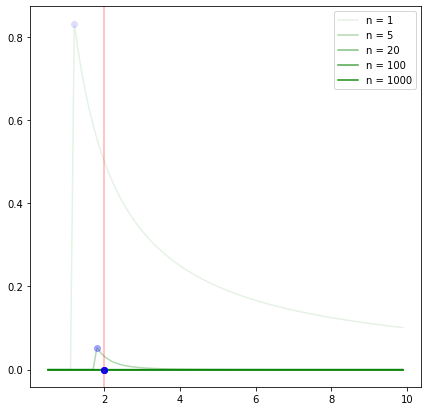

In [10]:
#7.1(б) R[0,teta]
import warnings
warnings.filterwarnings('ignore')

teta_true = 2
def f(x,teta):
    if 0 <= x <= teta:
        return 1.0 / float(teta)
    else:
        return 0
n = [1,5,20,100,1000]
alpha = np.arange(0.1,1,1.0/float(len(n)))
Teta = np.arange(0.5,10,0.1)
fig, ax = plt.subplots(figsize=(7,7))
for i in range(len(n)):
    L = []
    x = scipy.stats.uniform.rvs(loc=0,scale=teta_true,size=n[i])
    L = np.array([np.prod([f(y,t) for y in x]) for t in Teta])
    ax.plot(Teta,L,label='n = '+str(n[i]),alpha=alpha[i],color='green')
    j = 0
    j = list(L).index(max(list(L)))
    print(Teta[j], max(list(L)))
    ax.plot(Teta[j],L[j],'ro',color='blue',alpha=alpha[i])
ax.axvline(teta_true,color='red',alpha=0.3)
ax.legend()
plt.show()

In [12]:
#7.2
def f(x,teta):
    return math.log(1.0/(math.pi * (1 + (x - teta)**2)))
teta_true = 5
k = 500
n = [5,10,20,50,100]
Teta = np.arange(3,7,0.01)
for i in range(len(n)):
    x = np.array([scipy.stats.cauchy.rvs(loc=teta_true,size=n[i]) for u in range(k)])
    x = np.sort(x, axis=1)
    L = []
    M = []
    for row in x:
        l = np.array([sum([f(y,teta) for y in row]) for teta in Teta])
        L.append(Teta[list(l).index(max(list(l)))])
    L = np.array(L)
    Median = np.median(x,axis=1)
    E_L = L.mean()
    D_L = L.var()
    E_M = Median.mean()
    D_M = Median.var()
    df = pd.DataFrame([[E_L, D_L],[E_M, D_M]], index=["ОМП", "Медиана"], columns=["E","D"])
    print('n = '+str(n[i])+'\n',df, '\n')

n = 5
                E         D
ОМП      4.99062  0.601363
Медиана  4.96622  1.123946 

n = 10
                 E         D
ОМП      4.997400  0.273419
Медиана  4.981889  0.336580 

n = 20
                 E         D
ОМП      5.015400  0.110359
Медиана  5.024543  0.135930 

n = 50
                 E         D
ОМП      4.984300  0.041544
Медиана  4.982848  0.052919 

n = 100
                 E         D
ОМП      4.986780  0.021837
Медиана  4.985877  0.028244 



In [9]:
#7.3 N(teta,1)
def f(x,teta):
    return math.log((1.0/math.sqrt(2 * math.pi)) * math.exp((-(x-teta)**2)/2))
teta_true = 5
k = 1
n = [1,5,20,50,100]
Teta = np.arange(-10,10,0.01)
for i in range(len(n)):
    x = np.array([scipy.stats.norm.rvs(loc=teta_true,size=n[i]) for u in range(k)])
    OMM = []
    OMP = []
    OMS = []
    for row in x:
        omm = np.mean(row)
        OMM.append(omm)
        
        omp = np.array([sum([f(y,teta) for y in row]) for teta in Teta])
        OMP.append(Teta[list(omp).index(max(list(omp)))])
        
        tmp1 = np.sort(row)
        D = []
        for teta in Teta:
            F = scipy.stats.norm.cdf(tmp1,loc=teta)
            d = 1
            for j in range(n[i]):
                if j == 0:
                    d = d * F[j]
                elif j == n[i]-1:
                    d = d * (1 - F[j])
                else:
                    d = d * (F[j] - F[j-1])
            D.append(d)
        OMS.append(Teta[list(D).index(max(list(D)))])
    df = pd.DataFrame([round(OMM[0],3),round(OMP[0],3),round(OMS[0],3)], index=["ОММ", "ОМП", "ОМС"], columns=["оценка"])
    print('n = '+str(n[i])+'\n',df, '\n\n')

n = 1
      оценка
ОММ   4.041
ОМП   4.040
ОМС -10.000 


n = 5
      оценка
ОММ   4.829
ОМП   4.830
ОМС   4.780 


n = 20
      оценка
ОММ   4.976
ОМП   4.980
ОМС   4.920 


n = 50
      оценка
ОММ   4.946
ОМП   4.950
ОМС   4.910 


n = 100
      оценка
ОММ   4.942
ОМП   4.940
ОМС   4.920 




n = 10
ОММ, OMП, OMC:  0.21 0.243 0.556
n = 20
ОММ, OMП, OMC:  0.252 0.303 0.533
n = 50
ОММ, OMП, OMC:  0.339 0.431 0.479


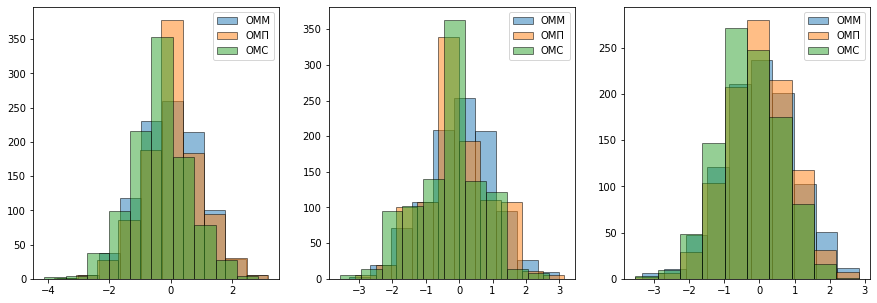

In [6]:
#7.3 N(teta,1)(Долго)
def f(x,teta):
    return math.log((1.0/math.sqrt(2 * math.pi)) * math.exp((-(x-teta)**2)/2))
teta_true = 5
k = 1000
n = [10,20,50]
Teta = np.arange(3,7,0.1)
fig, axis = plt.subplots(1,3, figsize=(15,5))
for i in range(len(n)):
    x = np.array([scipy.stats.norm.rvs(loc=teta_true,size=n[i]) for u in range(k)])
    OMM = []
    OMP = []
    OMS = []
    for row in x:
        omm = np.mean(row)
        OMM.append(omm)
        
        omp = np.array([sum([f(y,teta) for y in row]) for teta in Teta])
        OMP.append(Teta[list(omp).index(max(list(omp)))])
        
        tmp1 = np.sort(row)
        D = []
        for teta in Teta:
            F = scipy.stats.norm.cdf(tmp1,loc=teta)
            d = 1
            for j in range(n[i]):
                if j == 0:
                    d = d * F[j]
                elif j == n[i]-1:
                    d = d * (1 - F[j])
                else:
                    d = d * (F[j] - F[j-1])
            D.append(d)
        OMS.append(Teta[list(D).index(max(list(D)))])
    omm_count = 0
    omp_count = 0
    oms_count = 0
    for j in range(k):
        if abs(OMM[j] - teta_true) >= abs(OMP[j] - teta_true) and abs(OMM[j] - teta_true) >= abs(OMS[j] - teta_true):
            omm_count += 1
        if abs(OMP[j] - teta_true) >= abs(OMM[j] - teta_true) and abs(OMP[j] - teta_true) >= abs(OMS[j] - teta_true):
            omp_count += 1
        if abs(OMS[j] - teta_true) >= abs(OMM[j] - teta_true) and abs(OMS[j] - teta_true) >= abs(OMP[j] - teta_true):
            oms_count += 1
    print('n = '+str(n[i]))
    print('ОММ, OMП, OMC: ',round(omm_count/k,3),round(omp_count/k,3),round(oms_count/k,3))
    axis[i].hist(np.sqrt(n[i]) * (np.array(OMM) - teta_true),label='OMM',edgecolor = "black",alpha=0.5)
    axis[i].hist(np.sqrt(n[i]) * (np.array(OMP) - teta_true),label='OMП',edgecolor = "black",alpha=0.5)
    axis[i].hist(np.sqrt(n[i]) * (np.array(OMS) - teta_true),label='OMС',edgecolor = "black",alpha=0.5)
    axis[i].legend()
plt.show()